データの日付を入力してください:  20231125
測定回数を入力してください(例:1):  5
マッキベンの種類を入力してください(4s or 4l or 6 or s or u):  s
データ1の圧力を入力してください:  4
データ2の圧力を入力してください:  5
データ3の圧力を入力してください:  6
データ4の圧力を入力してください:  7
データ5の圧力を入力してください:  8


Estimated Parameters (extension):
c3_e: -9.03291266645907
c2_e: 0.4109951728718654
c1_e: -0.003053962299441002
c0_e: 5.157632558343496
Estimated Parameters (contraction):
c3_c: -10.80432839682982
c2_c: 0.4960315763555555
c1_c: -0.00398781852214094
c0_c: 4.900728282674353
Estimated Parameters(Contraction):
c3_0_c: 16.766241050982188
c2_0_c: 0.1802149427195396
c1_0_c: -0.0010647834569699117
c0_0_c: 1.1159017057652563
c3_1_c: 23.662266485127027
c2_1_c: 0.3649491851882091
c1_1_c: -0.0033430094760812288
c0_1_c: -2.6057151003243666
c3_2_c: 15.401343195882168
c2_2_c: 0.5712587231144122
c1_2_c: -0.005880737977117455
c0_2_c: -4.2010795828592595
c3_3_c: 9.421216618581434
c2_3_c: 0.6041200731777736
c1_3_c: -0.006640529155117475
c0_3_c: -4.450070236852348
c3_4_c: -9.542735224432892
c2_4_c: 0.5265705413989048
c1_4_c: -0.004371886991340696
c0_4_c: 3.0793346573847096
Estimated Parameters(Extension):
c3_0_c: 16.766241050982188
c2_0_c: 0.1802149427195396
c1_0_c: -0.0010647834569699117
c0_0_c: 1.1159017

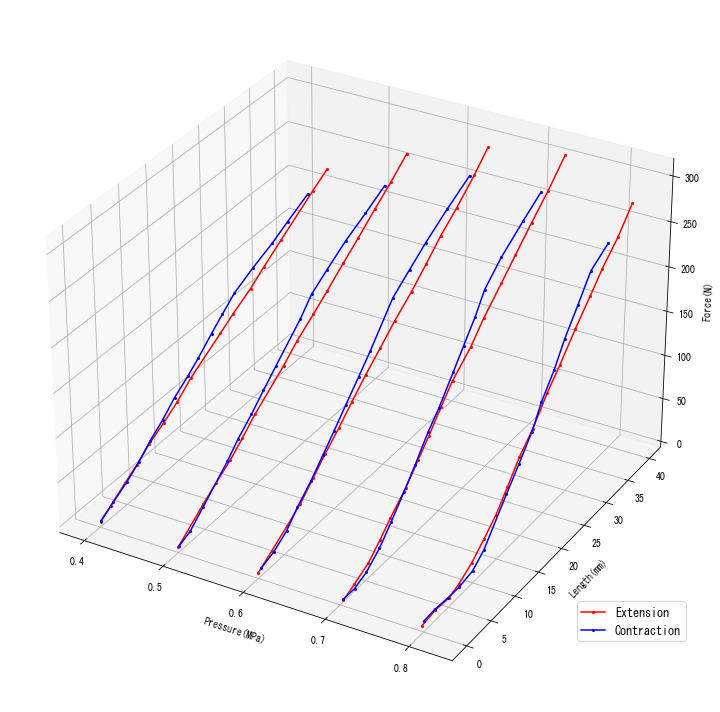

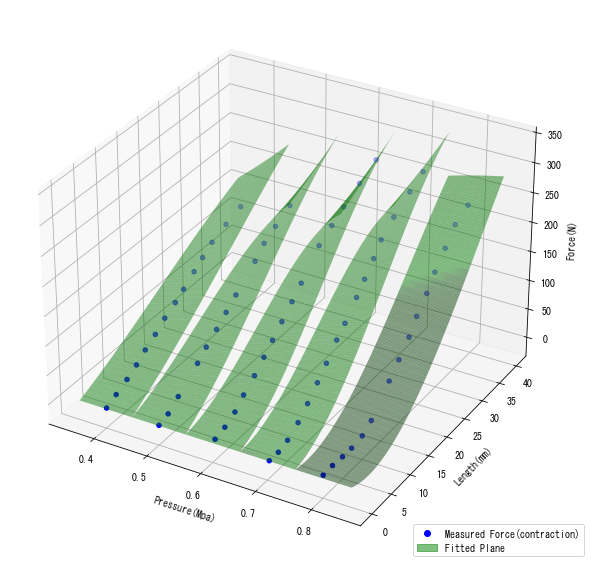

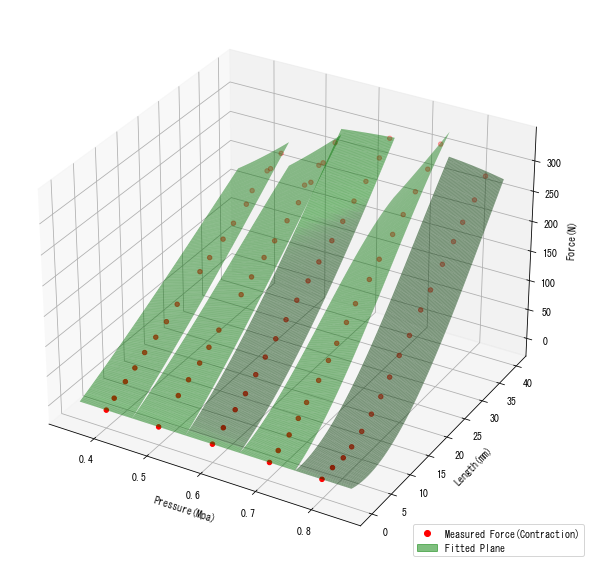

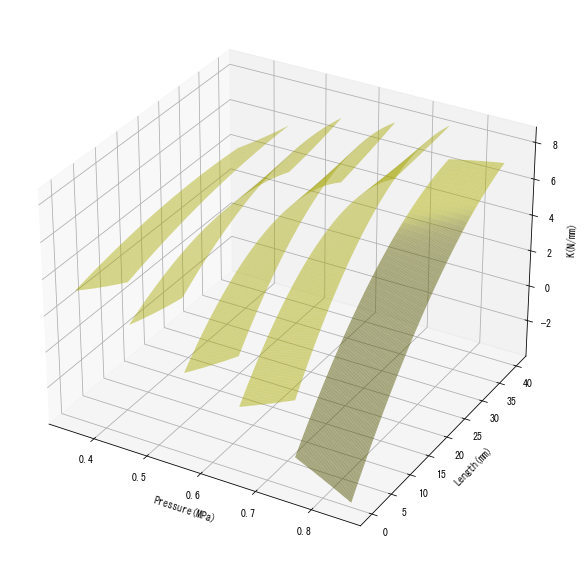

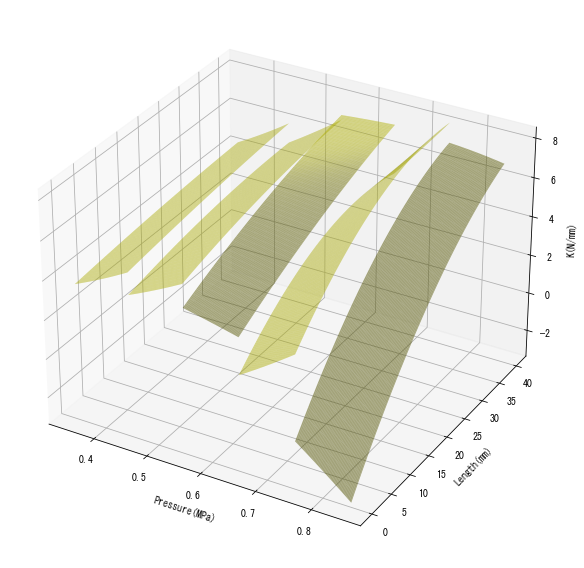

In [13]:
### %matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FormatStrFormatter, MultipleLocator
from datetime import datetime
from matplotlib.ticker import FixedLocator
import numpy as np
from scipy.optimize import curve_fit
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import csv


plt.rcParams['font.family'] = 'MS Gothic' #凡例やラベルに日本語を使っても文字化けしないようにする
current_date = datetime.now().strftime("%Y%m%d")

date = input("データの日付を入力してください: ")
count = input("測定回数を入力してください(例:1): ")  
measurement_kind = input("マッキベンの種類を入力してください(4s or 4l or 6 or s or u): ")  
pressure1 = input("データ1の圧力を入力してください: ")
pressure2 = input("データ2の圧力を入力してください: ")
pressure3 = input("データ3の圧力を入力してください: ")
pressure4 = input("データ4の圧力を入力してください: ")
pressure5 = input("データ5の圧力を入力してください: ")

pressure_with_decimal1 = f"0.{pressure1}" 
pressure_with_decimal2 = f"0.{pressure2}" 
pressure_with_decimal3 = f"0.{pressure3}" 
pressure_with_decimal4 = f"0.{pressure4}" 
pressure_with_decimal5 = f"0.{pressure5}" 

dt1 = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal1}_se.csv")
dt2 = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal2}_se.csv")
dt3 = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal3}_se.csv")
dt4 = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal4}_se.csv")
dt5 = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal5}_se.csv")

#dt1 = pd.read_csv(f"C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal1}_se.csv")
#dt2 = pd.read_csv(f"C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal2}_se.csv")
#dt3 = pd.read_csv(f"C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal3}_se.csv")
#dt4 = pd.read_csv(f"C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal4}_se.csv")
#dt5 = pd.read_csv(f"C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\data\\real_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal5}_se.csv")

column1 = dt1[["Pressure","Length","Force"]]
column2 = dt2[["Pressure","Length","Force"]]
column3 = dt3[["Pressure","Length","Force"]]
column4 = dt4[["Pressure","Length","Force"]]
column5 = dt5[["Pressure","Length","Force"]]

combined_column = pd.concat([column1,column2,column3,column4,column5])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d') #例えば．(221, projection='3d')(222, projection='3d')(223, projection='3d')(224, projection='3d')とすれば，4つグラフを並べられる 

dt_list = [column1, column2, column3, column4, column5]

# 圧力ごとにデータを分割
pressure_values_list = [column["Pressure"].values for column in dt_list]
length_values_list = [column["Length"].values for column in dt_list]
force_values_list = [column["Force"].values for column in dt_list]

# 関数の定義
def calculate_F(data, c3, c2, c1, c0):
    P, L = data
    K = c3 * P**2 + c2 * P * L + c1 * L**2 + c0
    F = K * L
    return F

# 関数の定義
def calculate_K(P, L, c3, c2, c1, c0):
    K = c3 * P**2 + c2 * P * L + c1 * L**2 + c0
    return K 

# パラメータの初期値
initial_guess = [1.0, 1.0, 1.0, 1.0]

for i, column in enumerate(dt_list):
    pressure_values = column["Pressure"].values
    length_values = column["Length"].values
    force_values = column["Force"].values

    # Forceが最大値を取るまでの範囲を赤でプロット
    idx_max_force = column["Force"].idxmax()
    ax.plot(pressure_values[:idx_max_force + 1], length_values[:idx_max_force + 1], force_values[:idx_max_force + 1], c='r', marker='o', markersize=2)

    # Forceが最大値を取った後の範囲を青でプロット
    ax.plot(pressure_values[idx_max_force + 1:], length_values[idx_max_force + 1:], force_values[idx_max_force + 1:], c='b', marker='o', markersize=2)
    
ax.set_xlabel('Pressure(MPa)')
ax.set_ylabel('Length(mm)')
ax.set_zlabel('Force(N)')

fig.legend(labels=['Extension', 'Contraction'], loc=(0.8,0.1), fontsize='large')

# 0.3から0.9まで0.1刻みの目盛りを設定
ax.set_xticks([0.4, 0.5, 0.6, 0.7, 0.8])

# 0.3から0.9までの範囲にx軸のグリッドを表示
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

# メモリの位置を調整
ax.xaxis.set_major_locator(MultipleLocator(0.1))

# グリッドの表示
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()

# 最大値取得前のデータをまとめる
before_max_force_data = pd.concat([dt1.iloc[:idx_max_force + 1, :], dt2.iloc[:idx_max_force + 1, :], dt3.iloc[:idx_max_force + 1, :], dt4.iloc[:idx_max_force + 1, :], dt5.iloc[:idx_max_force + 1, :]])

# 最大値取得後のデータをまとめる
after_max_force_data = pd.concat([dt1.iloc[idx_max_force + 1:, :], dt2.iloc[idx_max_force + 1:, :], dt3.iloc[idx_max_force + 1:, :], dt4.iloc[idx_max_force + 1:, :], dt5.iloc[idx_max_force + 1:, :]])

pressure_values_c = after_max_force_data["Pressure"].values
length_values_c = after_max_force_data["Length"].values
force_values_c = after_max_force_data["Force"].values

pressure_values_e = before_max_force_data["Pressure"].values
length_values_e = before_max_force_data["Length"].values
force_values_e = before_max_force_data["Force"].values



#全体での最小二乗法によるフィッティング
params_e, covariance_e = curve_fit(calculate_F, (pressure_values_e,length_values_e), force_values_e, p0=initial_guess)
params_c, covariance_c = curve_fit(calculate_F, (pressure_values_c,length_values_c), force_values_c, p0=initial_guess)

# 全体で推定されたパラメータ

c3_e, c2_e, c1_e, c0_e = params_e
c3_c, c2_c, c1_c, c0_c = params_c

print(f"Estimated Parameters (extension):")
print(f"c3_e: {c3_e}")
print(f"c2_e: {c2_e}")
print(f"c1_e: {c1_e}")
print(f"c0_e: {c0_e}")

print(f"Estimated Parameters (contraction):")
print(f"c3_c: {c3_c}")
print(f"c2_c: {c2_c}")
print(f"c1_c: {c1_c}")
print(f"c0_c: {c0_c}")

# 3D散布図(Conraction)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


# 各圧力ごとにフィッティングしたパラメータを格納する辞書
fit_params_dict_c = {}

for i in range(5):
    if i == 0:
        pressure_range = (0.35, 0.45)
    elif i == 1:
        pressure_range = (0.45, 0.55)
    elif i == 2:
        pressure_range = (0.55, 0.65)
    elif i == 3:
        pressure_range = (0.65, 0.75)
    elif i == 4:
        pressure_range = (0.75, 0.85)

    # データを指定された範囲で抽出
    selected_data = after_max_force_data[(after_max_force_data['Pressure'] >= pressure_range[0]) & (after_max_force_data['Pressure'] < pressure_range[1])]

    # フィッティング
    params, covariance = curve_fit(calculate_F, (selected_data['Pressure'], selected_data['Length']), selected_data['Force'], p0=initial_guess)
    fit_params_dict_c[f'c3_{i}_c'] = params[0]
    fit_params_dict_c[f'c2_{i}_c'] = params[1]
    fit_params_dict_c[f'c1_{i}_c'] = params[2]
    fit_params_dict_c[f'c0_{i}_c'] = params[3]

    # 3D散布図にプロット
    scatter = ax.scatter(selected_data['Pressure'], selected_data['Length'], selected_data['Force'], c=f'b', marker='o', label=f'Measured Force (Pressure Range: {pressure_range})')

    # フィッティングした平面
    P_plane, L_plane = np.meshgrid(np.linspace(min(pressure_range), max(pressure_range), 100),
                                   np.linspace(0, 40, 100))  #圧力と長さの範囲はマッキベンの種類ごとに変える．
    F_plane = calculate_F((P_plane, L_plane), *params)
    plane = ax.plot_surface(P_plane, L_plane, F_plane, color=f'g', alpha=0.5, label=f'Fitted Plane (Pressure Range: {pressure_range})')

    
print(f"Estimated Parameters(Contraction):")
# パラメータの表示
for key, value in fit_params_dict_c.items():
    print(f"{key}: {value}")
    
c0_0_c = fit_params_dict_c['c0_0_c']
c1_0_c = fit_params_dict_c['c1_0_c']
c2_0_c = fit_params_dict_c['c2_0_c']
c3_0_c = fit_params_dict_c['c3_0_c']
    
c0_1_c = fit_params_dict_c['c0_1_c']
c1_1_c = fit_params_dict_c['c1_1_c']
c2_1_c = fit_params_dict_c['c2_1_c']
c3_1_c = fit_params_dict_c['c3_1_c']
    
c0_2_c = fit_params_dict_c['c0_2_c']
c1_2_c = fit_params_dict_c['c1_2_c']
c2_2_c = fit_params_dict_c['c2_2_c']
c3_2_c = fit_params_dict_c['c3_2_c']
    
c0_3_c = fit_params_dict_c['c0_3_c']
c1_3_c = fit_params_dict_c['c1_3_c']
c2_3_c = fit_params_dict_c['c2_3_c']
c3_3_c = fit_params_dict_c['c3_3_c']
    
c0_4_c = fit_params_dict_c['c0_4_c']
c1_4_c = fit_params_dict_c['c1_4_c']
c2_4_c = fit_params_dict_c['c2_4_c']
c3_4_c = fit_params_dict_c['c3_4_c']



# グラフにラベルやタイトルを追加
ax.set_xlabel('Pressure(Mpa)')
ax.set_ylabel('Length(mm)')
ax.set_zlabel('Force(N)')

# 凡例を追加
legend_elements = [Line2D([0], [0], color='b', marker='o', linestyle='',label='Measured Force(contraction)'),
                   Patch(color='g', alpha=0.5, label='Fitted Plane')]
ax.legend(handles=legend_elements, loc='lower right',bbox_to_anchor=(1.05, 0.0))

# グラフを保存
plt.tight_layout()
save_path = f'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\F_fit\\contraction_improved\\F_fit_{date}_{count}_{measurement_kind}_ci5.jpg'
#save_path = f'C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\F_fit\\contraction_improved\\F_fit_{date}_{count}_{measurement_kind}_ci.jpg'
plt.savefig(save_path, bbox_inches='tight')



# 3D散布図(Extension)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

fit_params_dict_e = {}

# 各圧力ごとにフィッティング
for i in range(5):
    if i == 0:
        pressure_range = (0.35, 0.45)
    elif i == 1:
        pressure_range = (0.45, 0.55)
    elif i == 2:
        pressure_range = (0.55, 0.65)
    elif i == 3:
        pressure_range = (0.65, 0.75)
    elif i == 4:
        pressure_range = (0.75, 0.85)

    # データを指定された範囲で抽出
    selected_data = before_max_force_data [(before_max_force_data ['Pressure'] >= pressure_range[0]) & (before_max_force_data ['Pressure'] < pressure_range[1])]

    # フィッティング
    params, covariance = curve_fit(calculate_F, (selected_data['Pressure'], selected_data['Length']), selected_data['Force'], p0=initial_guess)
    fit_params_dict_e[f'c3_{i}_e'] = params[0]
    fit_params_dict_e[f'c2_{i}_e'] = params[1]
    fit_params_dict_e[f'c1_{i}_e'] = params[2]
    fit_params_dict_e[f'c0_{i}_e'] = params[3]

    # 3D散布図にプロット
    scatter = ax.scatter(selected_data['Pressure'], selected_data['Length'], selected_data['Force'], c=f'r', marker='o', label=f'Measured Force (Pressure Range: {pressure_range})')

    # フィッティングした平面
    P_plane, L_plane = np.meshgrid(np.linspace(min(pressure_range), max(pressure_range), 100),np.linspace(0,40,100))#圧力と長さの範囲はマッキベンの種類ごとに変える．
    F_plane = calculate_F((P_plane, L_plane), *params)
    plane = ax.plot_surface(P_plane, L_plane, F_plane, color=f'g', alpha=0.5, label=f'Fitted Plane (Pressure Range: {pressure_range})')
    
    
print(f"Estimated Parameters(Extension):")

# パラメータの表示
for key, value in fit_params_dict_c.items():
    print(f"{key}: {value}")
    
# c0_0_e = fit_params_dict_e['c0_0_e']
# c1_0_e = fit_params_dict_e['c1_0_e']
# c2_0_e = fit_params_dict_e['c2_0_e']
# c3_0_e = fit_params_dict_e['c3_0_e']
    
# c0_1_e = fit_params_dict_e['c0_1_e']
# c1_1_e = fit_params_dict_e['c1_1_e']
# c2_1_e = fit_params_dict_e['c2_1_e']
# c3_1_e = fit_params_dict_e['c3_1_e']
    
# c0_2_e = fit_params_dict_e['c0_2_e']
# c1_2_e = fit_params_dict_e['c1_2_e']
# c2_2_e = fit_params_dict_e['c2_2_e']
# c3_2_e = fit_params_dict_e['c3_2_e']
    
# c0_3_e = fit_params_dict_e['c0_3_e']
# c1_3_e = fit_params_dict_e['c1_3_e']
# c2_3_e = fit_params_dict_e['c2_3_e']
# c3_3_e = fit_params_dict_e['c3_3_e']
    
# c0_4_e = fit_params_dict_e['c0_4_e']
# c1_4_e = fit_params_dict_e['c1_4_e']
# c2_4_e = fit_params_dict_e['c2_4_e']
# c3_4_e = fit_params_dict_e['c3_4_e']


# グラフにラベルやタイトルを追加
ax.set_xlabel('Pressure(Mpa)')
ax.set_ylabel('Length(mm)')
ax.set_zlabel('Force(N)')

# 凡例を追加
legend_elements = [
    Line2D([0], [0], color='r', marker='o', linestyle='', label='Measured Force(Contraction)'),
    Patch(color='g', alpha=0.5, label='Fitted Plane')
]
ax.legend(handles=legend_elements, loc='lower right',bbox_to_anchor=(1.05, 0.0))

# グラフを保存
plt.tight_layout()
save_path = f'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\F_fit\\extension_improved\\F_fit_{date}_{count}_{measurement_kind}_ei5.jpg'
#save_path = f'C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\F_fit\\extension_improved\\F_fit_{date}_{count}_{measurement_kind}_ei.jpg'
plt.savefig(save_path, bbox_inches='tight')

#以下Kフィッティング

# Contraction
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 各圧力ごとにフィッティング
for i in range(5):
    if i == 0:
        pressure_range = (0.35, 0.45)
    elif i == 1:
        pressure_range = (0.45, 0.55)
    elif i == 2:
        pressure_range = (0.55, 0.65)
    elif i == 3:
        pressure_range = (0.65, 0.75)
    elif i == 4:
        pressure_range = (0.75, 0.85)

    # データを指定された範囲で抽出
    selected_data = after_max_force_data [(after_max_force_data ['Pressure'] >= pressure_range[0]) & (after_max_force_data ['Pressure'] < pressure_range[1])]

     # Kの平面
    P_plane, L_plane = np.meshgrid(np.linspace(min(pressure_range), max(pressure_range), 100),
                                   np.linspace(0,40,100))#圧力と長さの範囲はマッキベンの種類ごとに変える．
    K_plane = calculate_K(P_plane, L_plane, fit_params_dict_c[f'c3_{i}_c'], fit_params_dict_c[f'c2_{i}_c'],fit_params_dict_c[f'c1_{i}_c'], fit_params_dict_c[f'c0_{i}_c'])
    ax.plot_surface(P_plane, L_plane, K_plane, color='y', alpha=0.5, label='K(P, L) Plane')
    
ax.set_xlabel('Pressure(MPa)')
ax.set_ylabel('Length(mm)')
ax.set_zlabel('K(N/mm)')

plt.tight_layout()
save_path = f'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\K_fit\\contraction_improved\\K_fit_{date}_{count}_{measurement_kind}_ci5.jpg'
#save_path = f'C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\K_fit\\extension_improved\\K_fit_{date}_{count}_{measurement_kind}_ei.jpg'
plt.savefig(save_path,bbox_inches='tight')

# EXtension
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 各圧力ごとにフィッティング
for i in range(5):
    if i == 0:
        pressure_range = (0.35, 0.45)
    elif i == 1:
        pressure_range = (0.45, 0.55)
    elif i == 2:
        pressure_range = (0.55, 0.65)
    elif i == 3:
        pressure_range = (0.65, 0.75)
    elif i == 4:
        pressure_range = (0.75, 0.85)

    # データを指定された範囲で抽出
    selected_data = before_max_force_data [(before_max_force_data ['Pressure'] >= pressure_range[0]) & (before_max_force_data ['Pressure'] < pressure_range[1])]

     # フィッティングした平面
    P_plane, L_plane = np.meshgrid(np.linspace(min(pressure_range), max(pressure_range), 100),
                                   np.linspace(0,40,100))#圧力と長さの範囲はマッキベンの種類ごとに変える．
    K_plane = calculate_K(P_plane, L_plane, fit_params_dict_e[f'c3_{i}_e'], fit_params_dict_e[f'c2_{i}_e'],fit_params_dict_e[f'c1_{i}_e'], fit_params_dict_e[f'c0_{i}_e'])
    ax.plot_surface(P_plane, L_plane, K_plane, color='y', alpha=0.5, label='K(P, L) Plane')
    
ax.set_xlabel('Pressure(MPa)')
ax.set_ylabel('Length(mm)')
ax.set_zlabel('K(N/mm)')


plt.tight_layout()
save_path = f'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\K_fit\\extension_improved\\K_fit_{date}_{count}_{measurement_kind}_ei5.jpg'
#save_path = f'C:\\Users\\Mizuki\\OneDrive - Kyoto University\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\K_fit\\extension_improved\\K_fit_{date}_{count}_{measurement_kind}_ei.jpg'
plt.savefig(save_path,bbox_inches='tight')


# ファイルへのパス
csv_file_path = f'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\estimated_parameter_improved\\{date}_{count}_{measurement_kind}_fp_improved5.csv'

# パラメータをCSVファイルに保存
with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Parameter', 'Value']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    # Extensionのパラメータ保存
    for i in range(5):
        writer.writerow({'Parameter': f'c3_{i}_e', 'Value': fit_params_dict_e[f'c3_{i}_e']})
        writer.writerow({'Parameter': f'c2_{i}_e', 'Value': fit_params_dict_e[f'c2_{i}_e']})
        writer.writerow({'Parameter': f'c1_{i}_e', 'Value': fit_params_dict_e[f'c1_{i}_e']})
        writer.writerow({'Parameter': f'c0_{i}_e', 'Value': fit_params_dict_e[f'c0_{i}_e']})

    # Contractionのパラメータ保存
    for i in range(5):
        writer.writerow({'Parameter': f'c3_{i}_c', 'Value': fit_params_dict_c[f'c3_{i}_c']})
        writer.writerow({'Parameter': f'c2_{i}_c', 'Value': fit_params_dict_c[f'c2_{i}_c']})
        writer.writerow({'Parameter': f'c1_{i}_c', 'Value': fit_params_dict_c[f'c1_{i}_c']})
        writer.writerow({'Parameter': f'c0_{i}_c', 'Value': fit_params_dict_c[f'c0_{i}_c']})

    # 全体の最小二乗法で推定されたパラメータ保存
    writer.writerow({'Parameter': 'c3_e', 'Value': c3_e})
    writer.writerow({'Parameter': 'c2_e', 'Value': c2_e})
    writer.writerow({'Parameter': 'c1_e', 'Value': c1_e})
    writer.writerow({'Parameter': 'c0_e', 'Value': c0_e})

    writer.writerow({'Parameter': 'c3_c', 'Value': c3_c})
    writer.writerow({'Parameter': 'c2_c', 'Value': c2_c})
    writer.writerow({'Parameter': 'c1_c', 'Value': c1_c})
    writer.writerow({'Parameter': 'c0_c', 'Value': c0_c})
